In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Define classes that can fly (1) and cannot fly (0)
fly_classes = [0, 2]  # airplane and bird
no_fly_classes = [1, 3, 4, 5, 6, 7, 8, 9]  # remaining classes

In [4]:
# Convert class labels to binary
y_train_bin = np.where(np.isin(y_train, fly_classes), 1, 0)
y_test_bin = np.where(np.isin(y_test, fly_classes), 1, 0)

In [5]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train_bin, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 62s 97ms/step - loss: 0.4357 - accuracy: 0.8152 - val_loss: 0.3687 - val_accuracy: 0.8479
Epoch 2/10
625/625 [==============================] - 57s 92ms/step - loss: 0.3605 - accuracy: 0.8513 - val_loss: 0.3645 - val_accuracy: 0.8477
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.3221 - accuracy: 0.8701 - val_loss: 0.3192 - val_accuracy: 0.8720
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2955 - accuracy: 0.8813 - val_loss: 0.2942 - val_accuracy: 0.8859
Epoch 5/10
625/625 [==============================] - 59s 95ms/step - loss: 0.2744 - accuracy: 0.8895 - val_loss: 0.2722 - val_accuracy: 0.8939
Epoch 6/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2521 - accuracy: 0.9006 - val_loss: 0.2757 - val_accuracy: 0.8910
Epoch 7/10
625/625 [==============================] - 61s 98ms/step - loss: 0.2327 - accuracy: 0.9068 - val_loss: 0.2681 - val_accuracy:

In [9]:
# Evaluate the model on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype('int32')

# Calculate evaluation metrics
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)
accuracy = accuracy_score(y_test_bin, y_pred)

313/313 [==============================] - 10s 31ms/step


In [10]:
# Print evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.7260
Recall: 0.7155
F1 Score: 0.7207
Accuracy: 0.8891


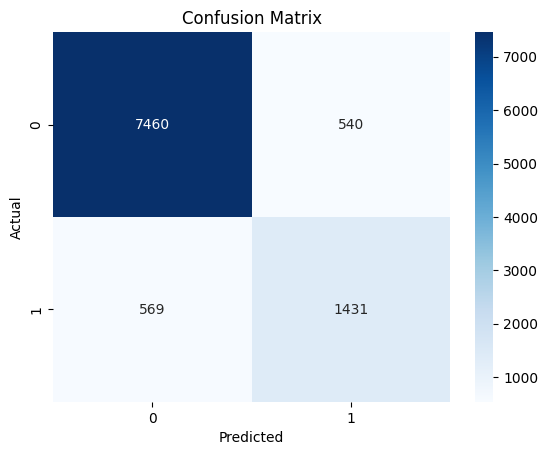

In [11]:
# Confusion matrix
cm = confusion_matrix(y_test_bin, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()